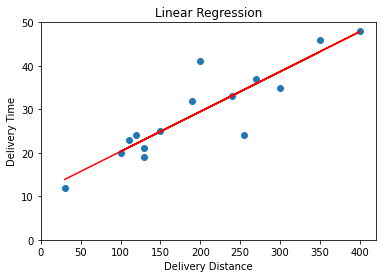

In [2]:
# 선형회귀
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt


# 배열[배달거리, 배달시간]=> 배달 거리에 따른 배달 시간 예측
data=np.array([[30,12],[150,25],[300,35],[400,48],[130,21],[240,33],[350,46],[200,41],[100,20],[110,23],[190,32],[120,24],[130,19],[270,37],[255,24]])
plt.scatter(data[:,0],data[:,1]) # 산포도 나타냄 선형회귀 (파란 점)
plt.title("Linear Regression") # 타이틀은 위쪽에 써짐
plt.xlabel("Delivery Distance") # x축은 배달 거리
plt.ylabel("Delivery Time") # y축은 배달 시간
plt.axis([0,420,0,50]) # 표의 범위. x축은 0~420, y축은 0~50

x=data[:,0].reshape(-1,1) # x는 입력으로 0차원 값
y=data[:,1].reshape(-1,1) # y는 출력으로 1차원 값lt.xlabel("Delivery Distance") # x축은 배달 거리
plt.ylabel("Delivery Time") # y축은 배달 시간
plt.axis([0,420,0,50]) # 표의 범위. x축은 0~420, y축은 0~50

x=data[:,0].reshape(-1,1) # x는 입력으로 0차원 값
y=data[:,1].reshape(-1,1) # y는 출력으로 1차원 값

model=LinearRegression() # 선형회귀 객체 생성
model.fit(x,y) # 모델 학습 

y_pred=model.predict(x) # x값이 주어졌을 때 예측값 계산
plt.plot(x,y_pred, color='r') # 입력에 따른 출력을 빨간색으로 그린다
plt.show()# 표로 보여주기


In [3]:
# 로지스틱 회귀
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

dataset=pd.read_csv('User_Data.csv') # 파일 읽어오기 (pandas이용)
x=dataset.iloc[:,[2,3]].values # 입력값. 2,3번째 열의 값-> 파일에서 보면 Age, EstimatedSalary
y=dataset.iloc[:,4].values # 출력값. 4번째 열의 값-> 파일에서 보면 Purchased

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0) # 테스트 데이터 25% 사용,무작위

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler() # 객체 생성
# train, test 데이터 정규화 -> 일정범위의 값을 가짐
xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.transform(xtest)
print(xtrain[0:10,:]) # 10개 출력

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0) # 객체 생성
classifier.fit(xtrain,ytrain) # 학습
y_pred=classifier.predict(xtest) # 예측

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_pred) # 혼동행렬 생성 후 비교
print('혼동행렬: \n',cm)

from sklearn.metrics import accuracy_score
print("정확도 : ",accuracy_score(ytest,y_pred)) # 정확도

from matplotlib.colors import ListedColormap
X_set, y_set=xtest,ytest

# 메시그리드 생성 (2~3차원의 격자점 좌표 생성)
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,
                            stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,
                            stop=X_set[:,1].max()+1,step=0.01))
                                                                  
# 컨투어 함수 적용
plt.contourf(X1, X2, classifier.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(
        X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(), X1.max()) # x축 범위
plt.ylim(X2.min(), X2.max()) # y축 범위

# 빨간색은 class 0, 초록색은 class 1. 오차도 발생
for i, j in enumerate(np.unique(y_set)): 
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Classifier (Test set)') # 타이틀
plt.xlabel('Age') # x축
plt.ylabel('Estimated Salary') # y축
plt.legend() 
plt.show()


FileNotFoundError: ignored

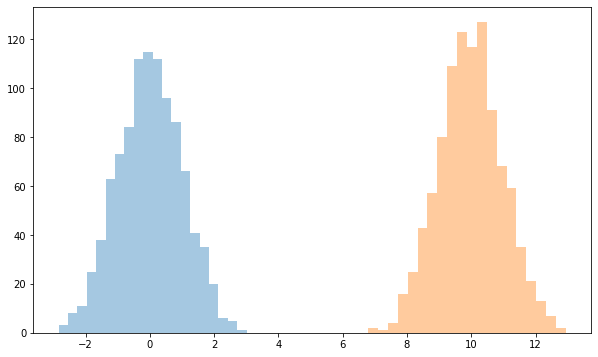

In [ ]:
# 히스토그램
import numpy as np
from matplotlib import pyplot as plt

X1=np.random.randn(1000) # 정규분포로 부터 1000개 랜덤 생성 (평균=0, 표준편차=1)
X2=10+np.random.randn(1000) # 0을 더해서 평균=10

plt.figure(figsize=(10,6))
# 비모수적
# 20개 구간에 해당하는 점의 개수를 표시
plt.hist(X1,bins=20, alpha=0.4)
plt.hist(X2,bins=20, alpha=0.4)
plt.show()

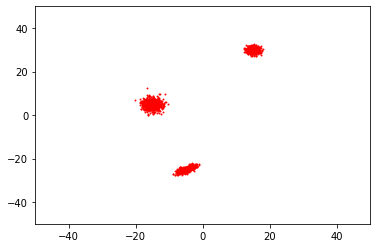

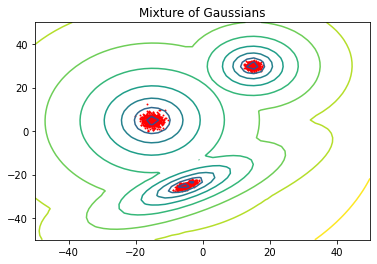

In [ ]:
# 혼성 가우시안 모델
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm 
from sklearn import mixture #가우시안

n_samples = 600 # 데이터 600개
np.random.seed(0) # 난수 발생 시드 값 0
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([15, 30]) # 랜덤으로 정규분포로부터 600개를 2차원으로 만든다. x는 +15, y는 +30

# 공분산 행렬. 
# 새로운 데이터를 만들 때 공분산을 이용해 만든다.
C1 = np.array([[0., -0.7], [1.5, .7]]) 
stretched_gaussian1 = np.dot(np.random.randn(n_samples, 2), C1)+ np.array([-5, -25]) # 제일 아래 쪽에 있는 것
C2 = np.array([[0.5, 1.7], [-1.5, 0.5]]) 
stretched_gaussian2 = np.dot(np.random.randn(n_samples, 2), C2)+ np.array([-15, 5]) # 중간에 있는 것

X_train = np.vstack([shifted_gaussian, stretched_gaussian1, stretched_gaussian2]) # 분포 3개를 수직으로 행을 추가해 연결
plt.xlim(-50,50) 
plt.ylim(-50,50) 
plt.scatter(X_train[:, 0], X_train[:, 1], .8, color='r')
plt.show()

clf=mixture.GaussianMixture(n_components=3, covariance_type='full') # 가우시안 3개, 전체 사용
clf.fit(X_train) # 학습
# 범위
x=np.linspace(-50.,50.)
y=np.linspace(-50.,50.)

X,Y=np.meshgrid(x,y)
XX=np.array([X.ravel(),Y.ravel()]).T
Z=-clf.score_samples(XX)
Z=Z.reshape(X.shape)

plt.contour(X,Y,Z,norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0,3,10))# 등고선
plt.scatter(X_train[:,0],X_train[:,1],.8, color='r')
plt.title('Mixture of Gaussians')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


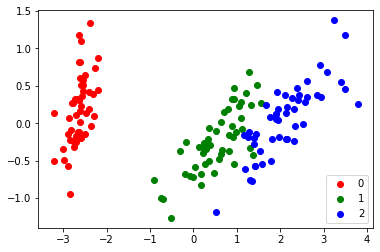

In [4]:
# 주성분 분석
from sklearn.decomposition import PCA # 주성분 분석
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

 # 붓꽃 데이터
iris = datasets.load_iris()
print(list(iris.keys())) # 키 값 출력
X=iris["data"][:,0:4]
label=iris["target"]

pca = PCA(n_components = 2) # 성분이 2개 분석
X2D = pca.fit_transform(X) # 모델학습

# 그래프 그리기. 부류가 3개로 나누어짐
for i, j in enumerate(np.unique(label)):
  plt.scatter(X2D[label == j, 0], X2D[label == j, 1],
              c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.legend()
plt.show()

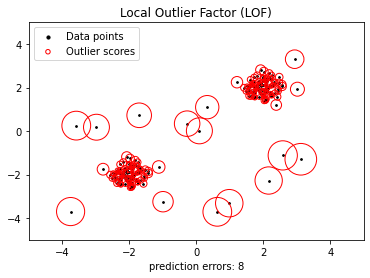

In [ ]:
# 이상치 탐지
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.neighbors import LocalOutlierFactor 

np.random.seed(42) 
# 데이터 만드는 과정
X_inliers = 0.3 * np.random.randn(100, 2) # 데이터 생성
X_inliers = np.r_[X_inliers + 2, X_inliers - 2] 
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2)) # 이상치 생성 
X = np.r_[X_inliers, X_outliers] # 데이터 만들어짐
n_outliers = len(X_outliers) 
ground_truth = np.ones(len(X), dtype=int) 
ground_truth[-n_outliers:] = -1

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1) # 이상치 감지 모델 생성
y_pred = clf.fit_predict(X) # 모델 예측
n_errors = (y_pred != ground_truth).sum() 
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)") 
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points') # 데이터 포인트를 검은 점으로 표시
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r', facecolors='none', label='Outlier scores') # 데이터 포인트 겉에 빨간 원 그리기. 원이 클수록 위험.
plt.axis('tight') 
# x,y 값 범위
plt.xlim((-5, 5)) 
plt.ylim((-5,5)) 
plt.xlabel("prediction errors: %d" % (n_errors)) 
legend = plt.legend(loc='upper left') 
legend.legendHandles[0]._sizes = [10] 
legend.legendHandles[1]._sizes = [20] 
plt.show()


In [7]:
# 결정트리 생성
from sklearn import datasets
import numpy as np

# 수치 속성
def test_split(index, value, dataset): # 데이터 분할
  left, right = list(), list() 
  for row in dataset: 
    # value를 기준으로 왼쪽, 오른쪽 값을 나눈다
    if row[index] < value: 
      left.append(row) 
    else:
      right.append(row) 
  return left, right

# 지니계수: 불순도 측정 지표, 데이터의 통계적 분산정도를 정량화해서 표현한 값.
# 지니계수가 높을 수록 데이터가 분산됨.
def gini_index(groups, classes):# 지니지수 계산
  n_instances = float(sum([len(group) for group in groups])) 
  gini = 0.0
  for group in groups:
    size = float(len(group))
    if size == 0:
      continue 
    score = 0.0 
    for class_val in classes:
      p = [row[-1] for row in group].count(class_val) / size
      score += p *p 
    gini += (1.0 - score) * (size / n_instances) 
  return gini


def get_split(dataset):# 분할 된 데이터를 가져온다
  class_values = list(set(row[-1] for row in dataset)) 
  b_index, b_value, b_score, b_groups = 999, 999, 999, None 
  for index in range(len(dataset[0])-1): 
    for row in dataset:
      groups = test_split(index, row[index], dataset) 
      gini = gini_index(groups, class_values) 
      if gini < b_score:
        b_index, b_value, b_score, b_groups = index, row[index], gini, groups 
  return {'index':b_index, 'value':b_value, 'groups':b_groups}

# 수치인 경우 값은 왼쪽, 오른쪽 브랜치로 분할된다
def split(node, max_depth, min_size, depth): # 분할
  left, right = node['groups'] 
  del(node['groups']) 
  if not left or not right:
    node['left'] = node['right'] = to_terminal(left + right)
    return 
  if depth >= max_depth:
    node['left'], node['right'] = to_terminal(left), to_terminal(right)
    return 
  if len(left) <= min_size:
    node['left'] = to_terminal(left) 
  else:
    node['left'] = get_split(left)
    split(node['left'], max_depth, min_size, depth+1) 
  if len(right) <= min_size:
    node['right'] = to_terminal(right) 
  else:
    node['right'] = get_split(right) 
    split(node['right'], max_depth, min_size, depth+1)

def to_terminal(group):
  outcomes = [row[-1] for row in group] 
  return max(set(outcomes), key=outcomes.count)


def build_tree(train, max_depth, min_size): # 결정트리 만들기
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

def print_tree(node, depth=0): # 트리 출력
  if isinstance(node, dict):
    print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
    print_tree(node['left'], depth+1)
    print_tree(node['right'], depth+1)
  else:
    print('%s[%s]' % ((depth*' ', node)))

iris = datasets.load_iris()
dataset = np.c_[iris.data, iris.target]

tree = build_tree(dataset, 3, 1) # 트리깊이 3
print_tree(tree)

[X3 < 3.000]
 [X1 < 5.100]
  [X1 < 4.900]
   [0.0]
   [0.0]
  [X1 < 5.100]
   [0.0]
   [0.0]
 [X4 < 1.800]
  [X3 < 5.000]
   [1.0]
   [2.0]
  [X3 < 4.900]
   [2.0]
   [2.0]


In [9]:
# 결정트리 회귀
from sklearn.tree import DecisionTreeRegressor # 결정트리 회귀 
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('housing.data', header=None,sep='\s+') # 집값에 대한 데이터를 읽어옴.
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
             'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] # 각 열에 대한 이름을 지정해 출력한다.
print(df.head()) # 모든 값은 수치형이다.

X = df[['LSTAT']].values # LSTAT를 입력값으로
y = df['MEDV'].values # MEDV를 출력값으로
tree = DecisionTreeRegressor(max_depth=3) # 깊이를 최대 3으로 결정트리 생성
tree.fit(X,y) # 학습

sort_idx = X.flatten().argsort()
plt.scatter(X[sort_idx],y[sort_idx], c='lightblue') # LSTAT와 MEDV를 좌표값으로 표에 그린다.
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color="red", linewidth=2) # X에 대해 예측된 y값을 빨간색으로 그린다. 회귀한 값
plt.xlabel('LSTAT(% Lower Status of the population)') 
plt.ylabel('MEDV(Price in $1000)') 
plt.show()


FileNotFoundError: ignored